In [8]:
import os
import numpy as np

import sklearn.model_selection as ms
import sklearn.metrics as skmetrics

from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

In [9]:
Y_train_1hot = np.loadtxt('train_test/label_train.txt')
Y_test_1hot = np.loadtxt('train_test/label_test.txt')
print Y_train_1hot.shape, Y_test_1hot.shape

IOError: train_test/label_train.txt not found.

In [3]:
Y_train = np.where(Y_train_1hot==1)[1]
Y_test = np.where(Y_test_1hot==1)[1]
print Y_train.shape, Y_test.shape

(700,) (300,)


**First** we will use the flattened matrices as feature and try different classification methods

In [4]:
X_flatten_train = np.load('train_test/X_train.npy').reshape(Y_train.shape[0],-1)
X_flatten_test = np.load('train_test/X_test.npy').reshape(Y_test.shape[0],-1)
print X_flatten_train.shape, X_flatten_test.shape

(700, 25800) (300, 25800)


1. SVM

In [ ]:
print 'Training SVM for flattened raw matrices ...'
clf = svm.SVC(gamma='scale').fit(X_flatten_train, Y_train)
Y_pred = clf.predict(X_flatten_test)
error = sum([1 for i in range(len(Y_test)) if Y_test[i] != Y_pred[i]])
train_error = clf.score(X_flatten_train, Y_train)
test_error = clf.score(X_flatten_test, Y_test)

print '\t# of Misclassification: %s' % str(error)
print '\tTrain accuracy: %s' % str(train_error)
print '\tTest accuracy: %s' % str(test_error)

2. LG

In [ ]:
print 'Training LR for flattened raw matrices ...' 

lr = LogisticRegression(random_state=0, solver='newton-cg').fit(X_flatten_train, Y_train)
Y_pred = lr.predict(X_flatten_test)
error = sum([1 for i in range(len(Y_test)) if Y_test[i] != Y_pred[i]])
train_error = lr.score(X_flatten_train, Y_train)
test_error = lr.score(X_flatten_test, Y_test)

print '\t# of Misclassification: %s' % str(error)
print '\tTrain accuracy: %s' % str(train_error)
print '\tTest accuracy: %s' % str(test_error)

In [5]:
fix = ['conv_10','conv_20','conv_100']
mat_path = 'train_test'

### SVM

In [ ]:
for name in fix:
    X_train = np.loadtxt(os.path.join(mat_path, name+'_train.txt'))
    X_test = np.loadtxt(os.path.join(mat_path, name+'_test.txt'))
    
    print 'Training SVM for %s ...' % name
    
    clf = svm.SVC(gamma='scale').fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    error = sum([1 for i in range(len(X_test)) if Y_test[i] != Y_pred[i]])
    train_error = clf.score(X_train, Y_train)
    test_error = clf.score(X_test, Y_test)

    print '\t# of Misclassification: %s' % str(error)
    print '\tTrain accuracy: %s' % str(train_error)
    print '\tTest accuracy: %s' % str(test_error)

### LR

In [19]:
for name in fix:
    X_train = np.loadtxt(os.path.join(mat_path, name+'_train.txt'))
    X_test = np.loadtxt(os.path.join(mat_path, name+'_test.txt'))
    
    print 'Training LR for %s ...' % name
    print X_train.shape, X_test.shape
    
    lr = LogisticRegression(random_state=0, solver='liblinear').fit(X_train, Y_train)
    Y_pred = lr.predict(X_test)
    train_error = lr.score(X_train, Y_train)
    test_error = lr.score(X_test, Y_test)

    print '\tTrain accuracy: %s' % str(train_error)
    print '\tTest accuracy: %s' % str(test_error)

Training LR for conv_10 ...
(700, 10) (300, 10)
	Train accuracy: 0.5485714285714286
	Test accuracy: 0.4266666666666667
Training LR for conv_20 ...
(700, 50) (300, 50)
	Train accuracy: 0.6314285714285715
	Test accuracy: 0.4666666666666667


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Training LR for conv_100 ...
(700, 100) (300, 100)
	Train accuracy: 0.79
	Test accuracy: 0.5


### NN

In [24]:
for name in fix:
    X_train = np.loadtxt(os.path.join(mat_path, name+'_train.txt'))
    X_test = np.loadtxt(os.path.join(mat_path, name+'_test.txt'))
    
    print 'Training simple NN for %s ...' % name
    
    nn = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(15,), random_state=1).fit(X_train, Y_train)
    Y_pred = nn.predict(X_test)
    train_error = nn.score(X_train, Y_train)
    test_error = nn.score(X_test, Y_test)

    print '\tTrain accuracy: %s' % str(train_error)
    print '\tTest accuracy: %s' % str(test_error)

Training simple NN for conv_10 ...
	Train accuracy: 0.5985714285714285
	Test accuracy: 0.44
Training simple NN for conv_20 ...
	Train accuracy: 0.76
	Test accuracy: 0.46
Training simple NN for conv_100 ...
	Train accuracy: 0.9742857142857143
	Test accuracy: 0.4533333333333333


#### GDA

In [30]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
for name in fix:
    X_train = np.loadtxt(os.path.join(mat_path, name+'_train.txt'))
    X_test = np.loadtxt(os.path.join(mat_path, name+'_test.txt'))
    
    print 'Training GDA for %s ...' % name
    gda = LinearDiscriminantAnalysis().fit(X_train, Y_train)
    Y_pred = gda.predict(X_test)
    train_error = gda.score(X_train, Y_train)
    test_error = gda.score(X_test, Y_test)

    print '\tTrain accuracy: %s' % str(train_error)
    print '\tTest accuracy: %s' % str(test_error)

Training GDA for conv_10 ...
	Train accuracy: 0.5457142857142857
	Test accuracy: 0.43333333333333335
Training GDA for conv_20 ...
	Train accuracy: 0.6971428571428572
	Test accuracy: 0.5066666666666667
Training GDA for conv_100 ...
	Train accuracy: 0.7814285714285715
	Test accuracy: 0.46


### Kmeans

In [9]:
for name in fix:
    X_train = np.loadtxt(os.path.join(mat_path, name+'_train.txt'))
    X_test = np.loadtxt(os.path.join(mat_path, name+'_test.txt'))
    
    print 'Training kmeans for %s ...' % name
    
    km = KMeans(n_clusters=10,n_init=30).fit(X_train)
    Y_pred = km.predict(X_test)
    test_error = skmetrics.accuracy_score(Y_pred, Y_test)

#   - Adjusted_rand_score: negative values are bad (independent labelings), similar 
#   - clusterings have a positive ARI, 1.0 is the perfect match score.
    Adjusted_rand_score = skmetrics.adjusted_rand_score(Y_pred, Y_test)
    
    print '\tAdjusted_rand_score: %s' % str(Adjusted_rand_score)
    print '\tTest accuracy: %s' % str(test_error)


Training kmeans for conv_10 ...
	Adjusted_rand_score: 0.2213157025
	Test accuracy: 0.08666666666666667
Training kmeans for conv_20 ...
	Adjusted_rand_score: 0.248361179846
	Test accuracy: 0.09
Training kmeans for conv_100 ...
	Adjusted_rand_score: 0.221885965086
	Test accuracy: 0.03


### Mixture of Gaussian

In [10]:
for name in fix:
    X_train = np.loadtxt(os.path.join(mat_path, name+'_train.txt'))
    X_test = np.loadtxt(os.path.join(mat_path, name+'_test.txt'))
    
    print 'Training kmeans for %s ...' % name
    
    gmm = GaussianMixture(
        n_components=2, covariance_type='tied').fit(X_train)
    Y_pred = gmm.predict(X_test)
    test_error = skmetrics.accuracy_score(Y_pred, Y_test)

#   - Adjusted_rand_score: negative values are bad (independent labelings), similar 
#   - clusterings have a positive ARI, 1.0 is the perfect match score.
    Adjusted_rand_score = skmetrics.adjusted_rand_score(Y_pred, Y_test)

    print '\tAdjusted_rand_score: %s' % str(Adjusted_rand_score)
    print '\tTest accuracy: %s' % str(test_error)


Training kmeans for conv_10 ...
	Adjusted_rand_score: 0.0729090151139
	Test accuracy: 0.01
Training kmeans for conv_20 ...
	Adjusted_rand_score: 0.0674258490282
	Test accuracy: 0.03
Training kmeans for conv_100 ...
	Adjusted_rand_score: 0.0516287857261
	Test accuracy: 0.12666666666666668


### See how PCA works

In [11]:
ind_test_0 = []
ind_test_1 = []
ind_test_2 = []
ind_test_3 = []
ind_test_4 = []
ind_test_5 = []
ind_test_6 = []
ind_test_7 = []
ind_test_8 = []
ind_test_9 = []

for i in range(len(Y_test)):
    if Y_test[i]==1: ind_test_1.append(i)
    if Y_test[i]==2: ind_test_2.append(i)
    if Y_test[i]==3: ind_test_3.append(i)
    if Y_test[i]==4: ind_test_4.append(i)
    if Y_test[i]==5: ind_test_5.append(i)
    if Y_test[i]==6: ind_test_6.append(i)
    if Y_test[i]==7: ind_test_7.append(i)
    if Y_test[i]==8: ind_test_8.append(i)
    if Y_test[i]==9: ind_test_9.append(i)
    else: ind_test_0.append(i)
        
ind_train_0 = []
ind_train_1 = []
ind_train_2 = []
ind_train_3 = []
ind_train_4 = []
ind_train_5 = []
ind_train_6 = []
ind_train_7 = []
ind_train_8 = []
ind_train_9 = []

for i in range(len(Y_pred)):
    if Y_pred[i]==1: ind_train_1.append(i)
    if Y_pred[i]==2: ind_train_2.append(i)
    if Y_pred[i]==3: ind_train_3.append(i)
    if Y_pred[i]==4: ind_train_4.append(i)
    if Y_pred[i]==5: ind_train_5.append(i)
    if Y_pred[i]==6: ind_train_6.append(i)
    if Y_pred[i]==7: ind_train_7.append(i)
    if Y_pred[i]==8: ind_train_8.append(i)
    if Y_pred[i]==9: ind_train_9.append(i)
    else: ind_train_0.append(i)

In [34]:
ind_pred_0 = []
ind_pred_1 = []
ind_pred_2 = []
ind_pred_3 = []
ind_pred_4 = []
ind_pred_5 = []
ind_pred_6 = []
ind_pred_7 = []
ind_pred_8 = []
ind_pred_9 = []

for i in range(len(Y_pred)):
    if Y_pred[i]==1: ind_pred_1.append(i)
    if Y_pred[i]==2: ind_pred_2.append(i)
    if Y_pred[i]==3: ind_pred_3.append(i)
    if Y_pred[i]==4: ind_pred_4.append(i)
    if Y_pred[i]==5: ind_pred_5.append(i)
    if Y_pred[i]==6: ind_pred_6.append(i)
    if Y_pred[i]==7: ind_pred_7.append(i)
    if Y_pred[i]==8: ind_pred_8.append(i)
    if Y_pred[i]==9: ind_pred_9.append(i)
    else: ind_pred_0.append(i)

In [37]:
name = 'conv_10'
X_train = np.loadtxt(os.path.join(mat_path, name+'_train.txt'))
X_test = np.loadtxt(os.path.join(mat_path, name+'_test.txt'))
pca = PCA(n_components=3).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print X_train_pca.shape
print X_test_pca.shape

(700, 3)
(300, 3)


In [ ]:
print X_test_pca[ind_test_0,1]

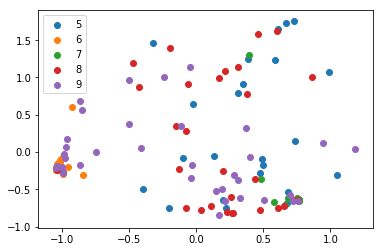

In [41]:
from matplotlib import pyplot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = pyplot.figure()
# ax = Axes3D(fig)
# ax.scatter(X_test_pca[ind_test_0,0], X_test_pca[ind_test_0,1], X_test_pca[ind_test_0,2] , label = '0')
# ax.scatter(X_test_pca[ind_test_1,0], X_test_pca[ind_test_1,1], X_test_pca[ind_test_1,2], label = '1')
# ax.scatter(X_test_pca[ind_test_2,0], X_test_pca[ind_test_2,1], X_test_pca[ind_test_2,2], label = '2')
# plt.scatter(X_test_pca[ind_test_3,0], X_test_pca[ind_test_3,1], X_test_pca[ind_test_3,2], label = '3')
# plt.scatter(X_test_pca[ind_test_4,0], X_test_pca[ind_test_4,1], X_test_pca[ind_test_4,2], label = '4')
# plt.scatter(X_test_pca[ind_test_5,0], X_test_pca[ind_test_5,1], X_test_pca[ind_test_5,2], label = '5')
# plt.scatter(X_test_pca[ind_test_6,0], X_test_pca[ind_test_6,1], X_test_pca[ind_test_6,2], label = '6')
# plt.scatter(X_test_pca[ind_test_7,0], X_test_pca[ind_test_7,1], X_test_pca[ind_test_7,2], label = '7')
# plt.scatter(X_test_pca[ind_test_8,0], X_test_pca[ind_test_8,1], X_test_pca[ind_test_8,2], label = '8')
# plt.scatter(X_test_pca[ind_test_9,0], X_test_pca[ind_test_9,1], X_test_pca[ind_test_9,2], label = '9')
# plt.legend()


# plt.scatter(X_test_pca[ind_test_0,0], X_test_pca[ind_test_0,1], label = '0')
# plt.scatter(X_test_pca[ind_test_1,0], X_test_pca[ind_test_1,1], label = '1')
# plt.scatter(X_test_pca[ind_test_2,0], X_test_pca[ind_test_2,1], label = '2')
# plt.scatter(X_test_pca[ind_test_3,0], X_test_pca[ind_test_3,1], label = '3')
# plt.scatter(X_test_pca[ind_test_4,0], X_test_pca[ind_test_4,1], label = '4')
plt.scatter(X_test_pca[ind_test_5,0], X_test_pca[ind_test_5,1], label = '5')
plt.scatter(X_test_pca[ind_test_6,0], X_test_pca[ind_test_6,1], label = '6')
plt.scatter(X_test_pca[ind_test_7,0], X_test_pca[ind_test_7,1], label = '7')
plt.scatter(X_test_pca[ind_test_8,0], X_test_pca[ind_test_8,1], label = '8')
plt.scatter(X_test_pca[ind_test_9,0], X_test_pca[ind_test_9,1], label = '9')
plt.legend()

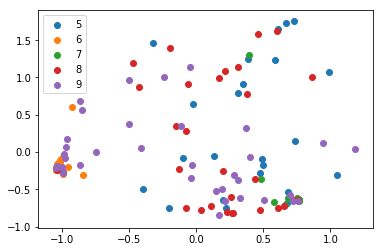

In [42]:
from matplotlib import pyplot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# fig = pyplot.figure()
# ax = Axes3D(fig)
# ax.scatter(X_test_pca[ind_test_0,0], X_test_pca[ind_test_0,1], X_test_pca[ind_test_0,2] , label = '0')
# ax.scatter(X_test_pca[ind_test_1,0], X_test_pca[ind_test_1,1], X_test_pca[ind_test_1,2], label = '1')
# ax.scatter(X_test_pca[ind_test_2,0], X_test_pca[ind_test_2,1], X_test_pca[ind_test_2,2], label = '2')
# plt.scatter(X_test_pca[ind_test_3,0], X_test_pca[ind_test_3,1], X_test_pca[ind_test_3,2], label = '3')
# plt.scatter(X_test_pca[ind_test_4,0], X_test_pca[ind_test_4,1], X_test_pca[ind_test_4,2], label = '4')
# plt.scatter(X_test_pca[ind_test_5,0], X_test_pca[ind_test_5,1], X_test_pca[ind_test_5,2], label = '5')
# plt.scatter(X_test_pca[ind_test_6,0], X_test_pca[ind_test_6,1], X_test_pca[ind_test_6,2], label = '6')
# plt.scatter(X_test_pca[ind_test_7,0], X_test_pca[ind_test_7,1], X_test_pca[ind_test_7,2], label = '7')
# plt.scatter(X_test_pca[ind_test_8,0], X_test_pca[ind_test_8,1], X_test_pca[ind_test_8,2], label = '8')
# plt.scatter(X_test_pca[ind_test_9,0], X_test_pca[ind_test_9,1], X_test_pca[ind_test_9,2], label = '9')
# plt.legend()


# plt.scatter(X_test_pca[ind_pred_0,0], X_test_pca[ind_pred_0,1], label = '0')
# plt.scatter(X_test_pca[ind_pred_1,0], X_test_pca[ind_pred_1,1], label = '1')
# plt.scatter(X_test_pca[ind_pred_2,0], X_test_pca[ind_pred_2,1], label = '2')
# plt.scatter(X_test_pca[ind_pred_3,0], X_test_pca[ind_pred_3,1], label = '3')
# plt.scatter(X_test_pca[ind_test_4,0], X_test_pca[ind_test_4,1], label = '4')
plt.scatter(X_test_pca[ind_test_5,0], X_test_pca[ind_test_5,1], label = '5')
plt.scatter(X_test_pca[ind_test_6,0], X_test_pca[ind_test_6,1], label = '6')
plt.scatter(X_test_pca[ind_test_7,0], X_test_pca[ind_test_7,1], label = '7')
plt.scatter(X_test_pca[ind_test_8,0], X_test_pca[ind_test_8,1], label = '8')
plt.scatter(X_test_pca[ind_test_9,0], X_test_pca[ind_test_9,1], label = '9')
plt.legend()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_train_pca[ind_train_1,0], X_train_pca[ind_train_1,1], X_train_pca[ind_train_1,2], label = '1')
ax.scatter(X_train_pca[ind_train_0,0], X_train_pca[ind_train_0,1], X_train_pca[ind_train_0,2], label = '0')
ax.legend()

#### pca-2d

In [ ]:
name = 'dense50'
X_train = np.loadtxt(os.path.join(mat_path, name+'_train.txt'))
X_test = np.loadtxt(os.path.join(mat_path, name+'_test.txt'))
pca = PCA(n_components=2).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
# print X_train_pca
# print X_test_pca

In [ ]:
plt.figure()

plt.scatter(X_train_pca[ind_train_1,0], X_train_pca[ind_train_1,1], label = '1')
plt.scatter(X_train_pca[ind_train_0,0], X_train_pca[ind_train_0,1], label = '0')
plt.legend()

In [ ]:
name = 'dense100'
X_train = np.loadtxt(os.path.join(mat_path, name+'_train.txt'))
X_test = np.loadtxt(os.path.join(mat_path, name+'_test.txt'))
pca = PCA(n_components=3).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
# print X_train_pca
# print X_test_pca

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_train_pca[ind_train_1,0], X_train_pca[ind_train_1,1], X_train_pca[ind_train_1,2], label = '1')
ax.scatter(X_train_pca[ind_train_0,0], X_train_pca[ind_train_0,1], X_train_pca[ind_train_0,2], label = '0')
ax.legend()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test_pca[ind_test_1,0], X_test_pca[ind_test_1,1], X_test_pca[ind_test_1,2], label = '1')
ax.scatter(X_test_pca[ind_test_0,0], X_test_pca[ind_test_0,1], X_test_pca[ind_test_0,2], label = '0')
ax.legend()